In [1]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataset = pd.read_csv(url, names = attributes)

In [3]:
# Checking the dataset
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Dimensions of the dataset
dataset.shape

(150, 5)

In [5]:
# Statistical Summary
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Class Distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

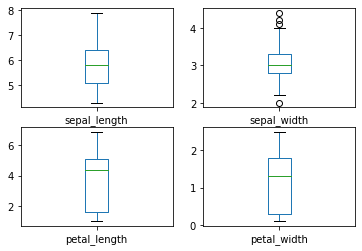

In [7]:
# Univariate plot - Box and Whisker plots
dataset.plot(kind='box', subplots = True, layout = (2,2), sharex=False, sharey = False)
plt.show()

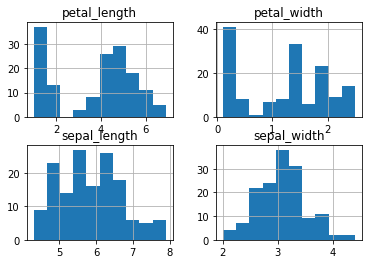

In [8]:
# Histogram of the variable
dataset.hist()
plt.show()

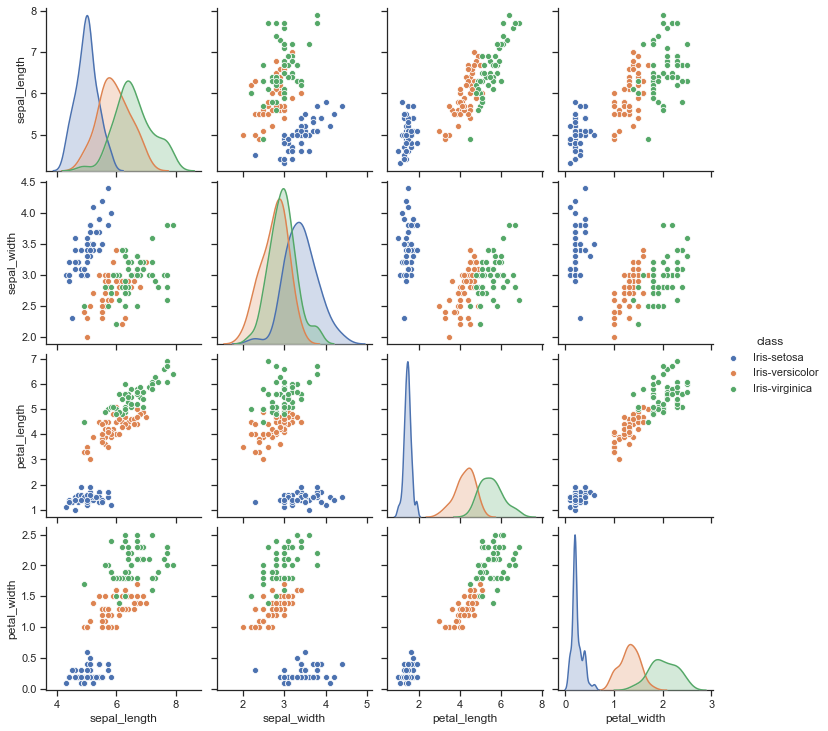

In [9]:
# Multivariate plots

sns.set(style="ticks")
sns.pairplot(dataset, hue="class")

In [10]:
# Creating a validation dataset and splitting the dataset
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:,4].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
# Classification & Regression Trees


#building models
models = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
models.append(('LDA', LinearDiscriminantAnalysis()))

# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
models.append(('KNN', KNeighborsClassifier()))

# Gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
models.append(('NB', GaussianNB()))

# Support Vector Machines
from sklearn.svm import SVC
models.append(('SVM', SVC(gamma='auto')))

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
models.append(('RF', RandomForestClassifier()))

In [12]:
# Evaluate the created models
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)
RF: 0.941667 (0.075000)


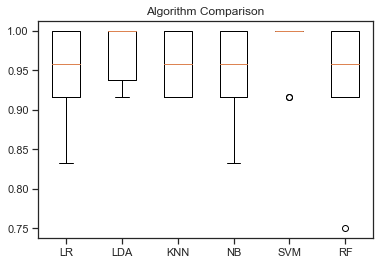

In [13]:
# Comparison of the models
plt.boxplot(results, labels = names)
plt.title('Algorithm Comparison')
plt.show()

In [14]:
# Making Predictions using SVM
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
y_pred = model.predict(X_validation)

In [15]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_validation, y_pred))

0.9666666666666667


In [16]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_validation, y_pred))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [17]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_validation, y_pred))

precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

